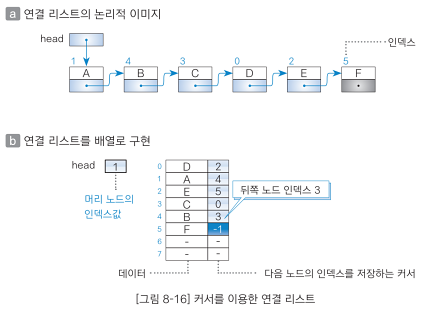

In [1]:
Null = -1

class Node:

    def __init__(self, data = Null , next = Null, dnext = Null):
        self.data = data # 데이터
        self.next = next # 리스트의 뒤쪽 포인터
        self.dnext = dnext # 프리 리스트의 뒤쪽 포인터

In [5]:
from typing import Any, Type

class ArrayLinkedList:
    """선형 리스트 클래스(배열 커서 버전)"""

    def __init__(self, capacity: int):
        """초기화"""
        self.head = Null                   # 머리 노드
        self.current = Null                # 주목 노드
        self.max = Null                    # 사용 중인 맨끝 레코드
        self.deleted = Null                # 프리 리스트의 머리 노드
        self.capacity = capacity           # 리스트의 크기
        self.n = [Node()] * self.capacity  # 리스트 본체
        self.no = 0


    def __len__(self) -> int:
        """선형 리스트의 노드 수를 반환"""
        return self.no

    def get_insert_index(self):
        """다음에 삽입할 레코드의 첨자를 구합니다"""
        if self.deleted == Null:  # 삭제 레코드는 존재하지 않습니다
            if self.max+1 < self.capacity:
                self.max += 1
                return self.max   # 새 레코드를 사용
            else:
                return Null       # 크기 초과
        else:
            rec = self.deleted                # 프리 리스트에서
            self.deleted = self.n[rec].dnext  # 맨 앞 rec를 꺼내기
            return rec

    def delete_index(self, idx: int) -> None:
        """레코드 idx를 프리 리스트에 등록"""
        if self.deleted == Null:      # 삭제 레코드는 존재하지 않습니다
            self.deleted = idx        # idx를 프리 리스트의
            self.n[idx].dnext = Null  # 맨 앞에 등록
        else:
            rec = self.deleted        # idx를 프리 리스트의
            self.deleted = idx        # 맨 앞에 삽입
            self.n[idx].dnext = rec

    def search(self, data: Any) -> int:
        """data와 값이 같은 노드를 검색"""
        cnt = 0
        ptr = self.head             # 현재 스캔 중인 노드
        while ptr != Null:
            if self.n[ptr].data == data:
                self.current = ptr
                return cnt          # 검색 성공
            cnt += 1
            ptr = self.n[ptr].next  # 뒤쪽 노드에 주목
        return Null                 # 검색 실패

    def __contains__(self, data: Any) -> bool:
        """선형 리스트에 data가 포함되어 있는지 확인"""
        return self.search(data) >= 0

    def add_first(self, data: Any):
        """머리 노드에 삽입"""
        ptr = self.head                     # 삽입하기 전의 머리 노드
        rec = self.get_insert_index()
        if rec != Null:
            self.head = self.current = rec  # rec번째 레코드에 삽입
            self.n[self.head] = Node(data, ptr)
            self.no += 1

    def add_last(self, data: Any) -> None:
        """꼬리 노드에 삽입"""
        if self.head == Null:     # 리스트가 비어 있으면
            self.add_first(data)  # 맨 앞에 노드 삽입
        else:
            ptr = self.head
            while self.n[ptr].next != Null:
                ptr = self.n[ptr].next
            rec = self.get_insert_index()

            if rec != Null:       # rec번째 레코드에 삽입
                self.n[ptr].next = self.current = rec
                self.n[rec] = Node(data)
                self.no += 1

    def remove_first(self) -> None:
        """머리 노드를 삭제"""
        if self.head != Null:  # 리스트가 비어 있으면
            ptr = self.n[self.head].next
            self.delete_index(self.head)
            self.head = self.current = ptr
            self.no -= 1

    def remove_last(self) -> None:
        """꼬리 노드를 삭제"""
        if self.head != Null:
            if self.n[self.head].next == Null:  # 노드가 1개 뿐이면
                self.remove_first()             # 머리 노드를 삭제
            else:
                ptr = self.head                 # 스캔 중인 노드
                pre = self.head                 # 스캔 중인 노드의 앞쪽 노드

                while self.n[ptr].next != Null:
                    pre = ptr
                    ptr = self.n[ptr].next
                self.n[pre].next = Null  # pre는 삭제한 뒤의 꼬리 노드
                self.delete_index(ptr)
                self.current = pre
                self.no -= 1

    def remove(self, p: int) -> None:
        """레코드 p를 삭제"""
        if self.head != Null:
            if p == self.head:       # p가 머리 노드면
                self.remove_first()  # 머리 노드를 삭제
            else:
                ptr = self.head

                while self.n[ptr].next != p:
                    ptr = self.n[ptr].next
                    if ptr == Null:
                        return  # p는 리스트에 존재하지 않음
                #self.n[ptr].next = Null
                self.delete_index(p)
                self.n[ptr].next = self.n[p].next
                self.current = ptr
                self.no -= 1

    def remove_current_node(self) -> None:
        """주목 노드를 삭제"""
        self.remove(self.current)

    def clear(self) -> None:
        """모든 노드를 삭제"""
        while self.head != Null:  # 리스트 전체가 빌 때까지
            self.remove_first()   # 머리 노드를 삭제
        self.current = Null

    def next(self) -> bool:
        """주목 노드를 한 칸 뒤로 진행"""
        if self.current == Null or self.n[self.current].next == Null:
            return False  # 진행할 수 없음
        self.current = self.n[self.current].next
        return True


    def print_current_node(self) -> None:
        """주목 노드를 출력"""
        if self.current == Null:
            print('주목 노드가 없습니다.')
        else:
            print(self.n[self.current].data)

    def print(self) -> None:
        """모든 노드를 출력"""
        ptr = self.head

        while ptr != Null:
            print(self.n[ptr].data)
            ptr = self.n[ptr].next

    def dump(self) -> None:
        """배열을 덤프"""
        for i in self.n:
            print(f'[{i}]  {i.data} {i.next} {i.dnext}')

    def __iter__(self):
        """이터레이터를 반환"""
        return ArrayLinkedListIterator(self.n, self.head)

class ArrayLinkedListIterator:
    """클래스 ArrayLinkedList의 이터레이터용 클래스"""

    def __init__(self, n: int, head: int):
        self.n = n
        self.current = head

    def __iter__(self) :
        return self

    def __next__(self) -> Any:
        if self.current == Null:
            raise StopIteration
        else:
            data = self.n[self.current].data
            self.current = self.n[self.current].next
            return data